# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | kiama
Processing Record 5 of Set 1 | mangan
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | inhambane
Processing Record 8 of Set 1 | moose factory
Processing Record 9 of Set 1 | mehamn
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | umea
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | kamra
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | khonuu
City not found. Skipping...
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | ghazipur
Processing Record 22 of Set 1 | mahebourg
Processing Record 23 of Set 1

Processing Record 35 of Set 4 | flinders
Processing Record 36 of Set 4 | hunza
City not found. Skipping...
Processing Record 37 of Set 4 | kapit
Processing Record 38 of Set 4 | midland
Processing Record 39 of Set 4 | chapais
Processing Record 40 of Set 4 | samarai
Processing Record 41 of Set 4 | alamos
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | vaitape
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | djibo
Processing Record 47 of Set 4 | luan
Processing Record 48 of Set 4 | reno
Processing Record 49 of Set 4 | boddam
Processing Record 0 of Set 5 | sao geraldo do araguaia
Processing Record 1 of Set 5 | bambous virieux
Processing Record 2 of Set 5 | susanino
Processing Record 3 of Set 5 | lodwar
Processing Record 4 of Set 5 | pokhara
Processing Record 5 of Set 5 | liepaja
Processing Record 6 of Set 5 | touros
Processing Record 7 of Set 5 | banda aceh
Processing Record 8 of Set 5 | poum
Processing

Processing Record 28 of Set 8 | kutum
Processing Record 29 of Set 8 | kokopo
Processing Record 30 of Set 8 | freeport
Processing Record 31 of Set 8 | quatre cocos
Processing Record 32 of Set 8 | upington
Processing Record 33 of Set 8 | sambava
Processing Record 34 of Set 8 | kangaatsiaq
Processing Record 35 of Set 8 | gamba
Processing Record 36 of Set 8 | xaxim
Processing Record 37 of Set 8 | marawi
Processing Record 38 of Set 8 | san luis
Processing Record 39 of Set 8 | qasigiannguit
Processing Record 40 of Set 8 | boulder city
Processing Record 41 of Set 8 | zhezkazgan
Processing Record 42 of Set 8 | vallenar
Processing Record 43 of Set 8 | kaili
Processing Record 44 of Set 8 | dallas
Processing Record 45 of Set 8 | warqla
City not found. Skipping...
Processing Record 46 of Set 8 | ust-maya
Processing Record 47 of Set 8 | perth
Processing Record 48 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 49 of Set 8 | uttiramerur
Processing Record 0 of Set 9 | comodoro rivadavia
Proces

Processing Record 14 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 15 of Set 12 | umm kaddadah
Processing Record 16 of Set 12 | sorland
Processing Record 17 of Set 12 | tessalit
Processing Record 18 of Set 12 | wuwei
Processing Record 19 of Set 12 | moerai
Processing Record 20 of Set 12 | yerkoy
Processing Record 21 of Set 12 | do gonbadan
Processing Record 22 of Set 12 | tanabe
Processing Record 23 of Set 12 | hamilton
Processing Record 24 of Set 12 | zaykovo
Processing Record 25 of Set 12 | arlit
Processing Record 26 of Set 12 | belyy yar
Processing Record 27 of Set 12 | diplo
Processing Record 28 of Set 12 | saint-louis
Processing Record 29 of Set 12 | nemuro
Processing Record 30 of Set 12 | borger
Processing Record 31 of Set 12 | san quintin
Processing Record 32 of Set 12 | oxford
Processing Record 33 of Set 12 | ust-tarka
Processing Record 34 of Set 12 | abomsa
Processing Record 35 of Set 12 | palimbang
Processing Record 36 of Set 12 | atbasar
Processing Reco

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,22.85,57,0,10.42,AU,1674555193
1,barrow,71.2906,-156.7887,-20.99,77,100,10.80,US,1674555327
2,vaini,-21.2000,-175.2000,27.09,89,40,3.09,TO,1674555327
3,kiama,-34.6833,150.8667,23.33,87,95,0.45,AU,1674555327
4,mangan,27.5167,88.5333,19.67,53,56,2.31,IN,1674555327


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,22.85,57,0,10.42,AU,1674555193
1,barrow,71.2906,-156.7887,-20.99,77,100,10.80,US,1674555327
2,vaini,-21.2000,-175.2000,27.09,89,40,3.09,TO,1674555327
3,kiama,-34.6833,150.8667,23.33,87,95,0.45,AU,1674555327
4,mangan,27.5167,88.5333,19.67,53,56,2.31,IN,1674555327


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

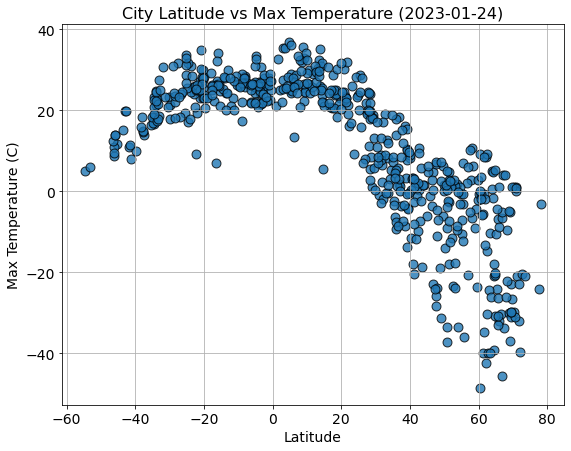

In [14]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9, 7))
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Max Temperature (C)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

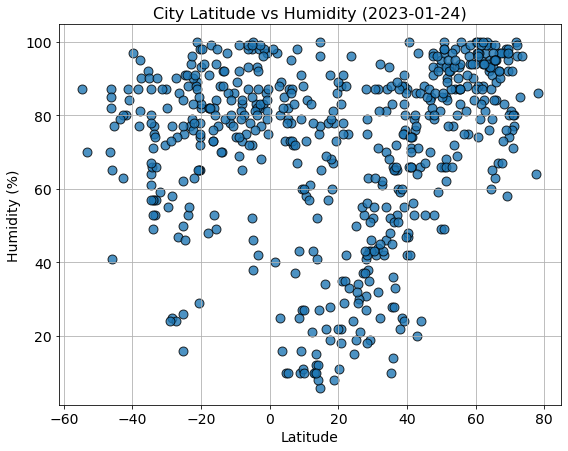

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9, 7))
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Humidity (%)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

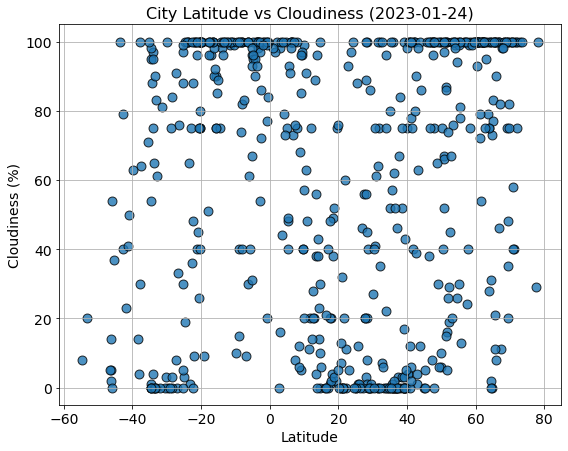

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9, 7))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Cloudiness (%)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

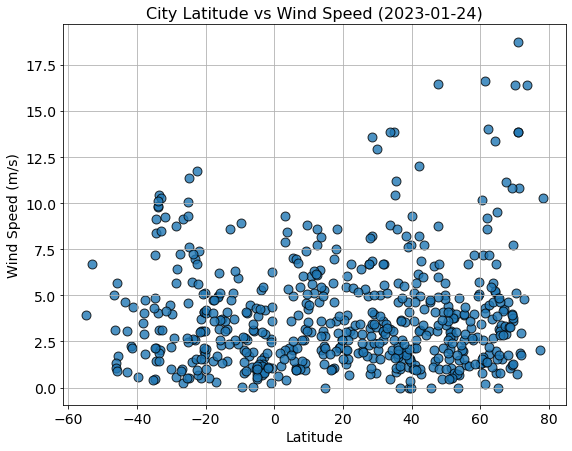

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9, 7))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Wind Speed (m/s)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def lin_reg(x, y, xlabel, ylabel, eq_loc):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(9,7))
    plt.scatter(x, y, s=80)
    plt.plot(x, regress_values, "red", linewidth=2)
    plt.annotate(line_eq, eq_loc, fontsize=20, color="red")
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.tick_params(labelsize=14)
    print(f'The r-value is:{r_value}')
    plt.show()

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,barrow,71.2906,-156.7887,-20.99,77,100,10.80,US,1674555327
4,mangan,27.5167,88.5333,19.67,53,56,2.31,IN,1674555327
7,moose factory,51.2585,-80.6094,-18.01,85,100,4.12,CA,1674555328
8,mehamn,71.0357,27.8492,0.97,80,40,13.89,NO,1674555328
9,klaksvik,62.2266,-6.5890,8.51,88,100,14.01,FO,1674555329


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,22.85,57,0,10.42,AU,1674555193
2,vaini,-21.2000,-175.2000,27.09,89,40,3.09,TO,1674555327
3,kiama,-34.6833,150.8667,23.33,87,95,0.45,AU,1674555327
5,ushuaia,-54.8000,-68.3000,5.11,87,8,3.92,AR,1674555328
6,inhambane,-23.8650,35.3833,30.92,53,100,5.72,MZ,1674555328


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.82476209186885


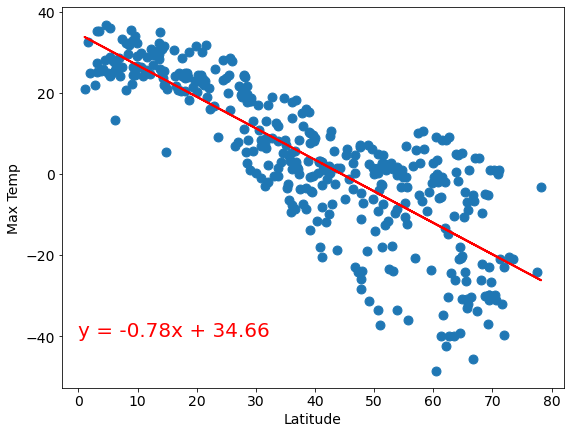

In [65]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", 
            "Max Temp", (0,-40))

The r-value is:0.5973417921984943


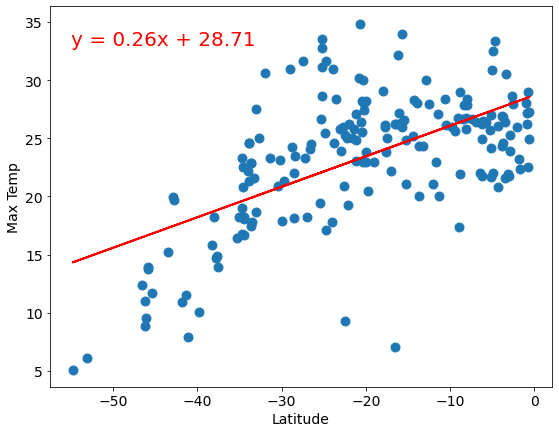

In [66]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", 
            "Max Temp", (-55,33))

**Discussion about the linear relationship:** 

This linear regression is modelling the changes in the temperautre in the Southern Hemisphere as we move closer to the equator and the changes in the temperature in the Northern Hemisphere as we move away from the equator to find any correlation. 
There is a stronger correlation between temperature and distance from the equator in the Northern Hemisphere than the Southern Hemisphere. We can see a negative correlation between the two factors in the Northern Hemisphere as temperatures drop as we move further away from the equator. A positive correlation can be seen between the two factors in the Southern Hemisphere as temperatures rise as we move closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.5065046175658177


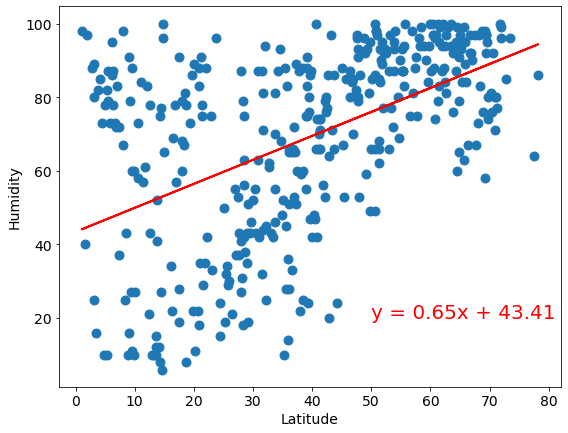

In [67]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", 
            "Humidity", (50,20))

The r-value is:0.21628306336897582


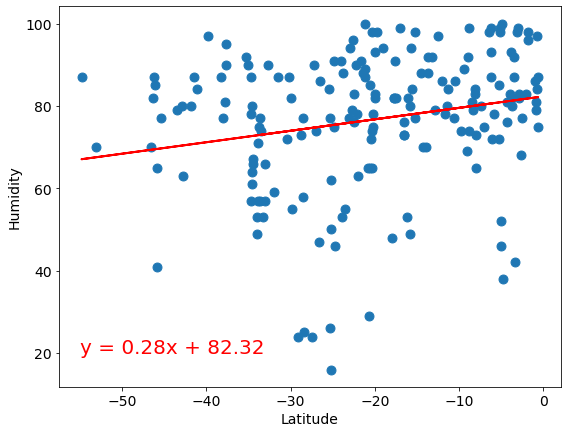

In [68]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", 
            "Humidity", (-55,20))

**Discussion about the linear relationship:** 

This linear regression is modelling the changes in the humidity in the Southern Hemisphere as we move closer to the equator and the changes in the humidity in the Northern Hemisphere as we move away from the equator to find any correlation. There is a weak positive correlation between the two factors in the Northern Hemisphere. There is barely any correlation between the two factors in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.3061632502151249


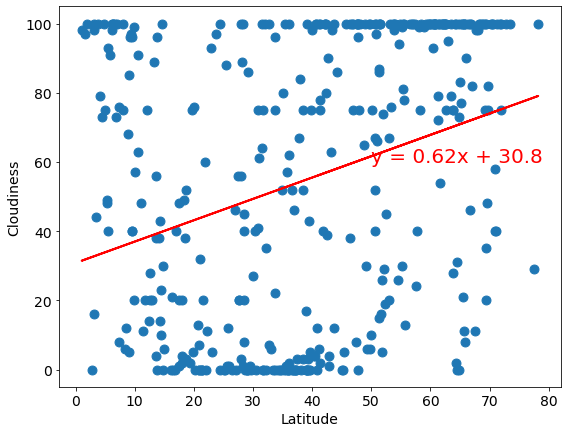

In [69]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", 
            "Cloudiness", (50,60))

The r-value is:0.49249604564145627


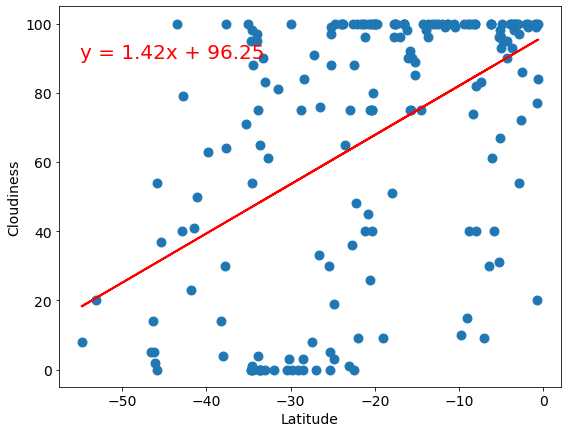

In [70]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", 
            "Cloudiness", (-55,90))

**Discussion about the linear relationship:** 

This linear regression is modelling the changes in the cloudiness in the Southern Hemisphere as we move closer to the equator and the changes in the cloudiness in the Northern Hemisphere as we move away from the equator to find any correlation.
There is a weak positive correlation between the two factors in the Northern Hemisphere. There is a slightly stronger but still weak positive correlation between the two factors in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.089942932855244


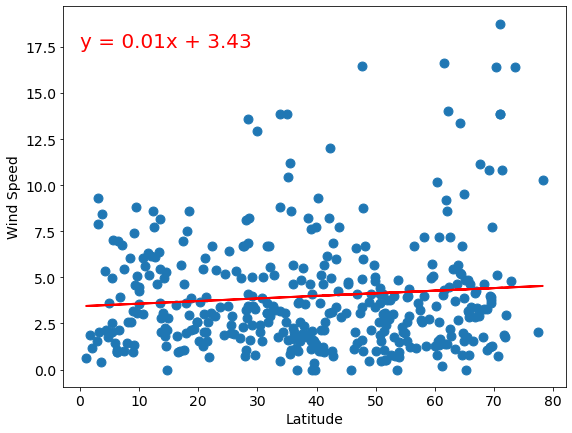

In [71]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", 
            "Wind Speed", (0,17.5))

The r-value is:-0.22893073587621485


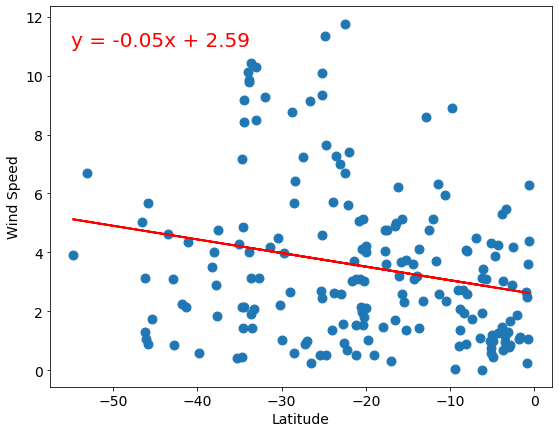

In [72]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", 
            "Wind Speed", (-55,11))

**Discussion about the linear relationship:** 

This linear regression is modelling the changes in the Wind Speed in the Southern Hemisphere as we move closer to the equator and the changes in the Wind Speed in the Northern Hemisphere as we move away from the equator to find any correlation.
There is almost no correlation between the two factors in the Northern Hemisphere. There is a very weak negative correlation between the two factors in the Southern Hemisphere.